<a href="https://colab.research.google.com/github/shoreey/Ovarian-Cancer-Analysis-and-Prediction/blob/main/ovarian_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import collections
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Reading dataset

In [ ]:
df = pd.read_excel("Database_AI.xlsx")
df.head(5)

,Filename,Data di nascita Paziente,Istologia,Grading,FIGO stage,BRCA,ECOG Performance Status,ca125 (numero intero),he4 (numero intero),ca 15.3 (numero intero),...,Terapia Neoadiuvante,IDS,Data IDS,RT IDS,Recidiva,Data recidiva,Ultimo follow-up,Morte,Data morte,Surgical outcome
0,34918138,1962-03-04,Carcinoma Sieroso Alto Grado,3.0,III b,VUS,0.0,963.0,NaN,NaN,...,No,NaN,NaT,NaN,No,NaT,2022-03-09 00:00:00,NaN,NaT,0
1,56770587,1962-01-15,Altri carcinomi ovarici,NaN,I,NaN,0.0,70.0,95.0,37.0,...,No,NaN,NaT,NaN,No,NaT,2022-01-24 00:00:00,No,NaT,0
2,79692917,1951-12-01,Carcinoma Sieroso Alto Grado,3.0,III c,non mutata,1.0,236.0,996.0,NaN,...,No,No,NaT,NaN,No,NaT,2021-12-23 00:00:00,No,NaT,0
3,86250014,1970-08-15,Carcinoma Sieroso Alto Grado,3.0,III c,non mutata,0.0,1228.0,NaN,74.0,...,Si,No,NaT,NaN,Si,2021-10-27,2022-03-02 00:00:00,No,NaT,1
4,103336863,1954-09-19,Carcinoma Sieroso Alto Grado,3.0,IV,non mutata,0.0,2709.0,387.0,NaN,...,Si,Si,2020-06-16,NaN,Si,2021-05-19,2021-11-30 00:00:00,No,NaT,1


In [ ]:
df.shape

(192, 27)

In [ ]:
df.columns

Index(['Filename', 'Data di nascita Paziente', 'Istologia', 'Grading',
       'FIGO stage', 'BRCA', 'ECOG Performance Status',
       'ca125 (numero intero)', 'he4 (numero intero)',
       'ca 15.3 (numero intero)', 'ca 19.9 (numero intero)',
       'cea (numero intero)', 'Familiarità neoplasia mammella/ovaio',
       'Data TC pre-intervento', 'Data primo intervento',
       'Tipologia primo intervento', 'RT', 'Terapia Neoadiuvante', 'IDS',
       'Data IDS', 'RT IDS', 'Recidiva', 'Data recidiva', 'Ultimo follow-up',
       'Morte', 'Data morte', 'Surgical outcome'],
      dtype='object')

### Renaming features name for better understanding as they are in ittalian language

In [ ]:
df = df.rename(columns = {'Data di nascita Paziente': 'Date of birth Patient','Istologia':'Histology',
                          'ca125 (numero intero)':'ca125 (integer)', 'he4 (numero intero)':'he4 (integer)',
                          'ca 15.3 (numero intero)':'ca 15.3 (integer)', 'ca 19.9 (numero intero)':'ca 19.9 (integer)',
                          'cea (numero intero)':'cea (integer)',
                          'Familiarità neoplasia mammella/ovaio':'Familiarity with breast/ovarian cancer',
                         'Data TC pre-intervento':'Pre-surgery CT date', 'Data primo intervento':'Date of first intervention',
                         'Tipologia primo intervento':'Type of first intervention',
                          'Terapia Neoadiuvante':'Neoadjuvant therapy', 'Recidiva':'Relapse',
                          'Data recidiva':'Recurrence date', 'Ultimo follow-up':'Last follow up','Morte':'Death', 'Data morte':'Date of death' })

In [ ]:
df.head(5)

,Filename,Date of birth Patient,Histology,Grading,FIGO stage,BRCA,ECOG Performance Status,ca125 (integer),he4 (integer),ca 15.3 (integer),...,Neoadjuvant therapy,IDS,Data IDS,RT IDS,Relapse,Recurrence date,Last follow up,Death,Date of death,Surgical outcome
0,34918138,1962-03-04,Carcinoma Sieroso Alto Grado,3.0,III b,VUS,0.0,963.0,NaN,NaN,...,No,NaN,NaT,NaN,No,NaT,2022-03-09 00:00:00,NaN,NaT,0
1,56770587,1962-01-15,Altri carcinomi ovarici,NaN,I,NaN,0.0,70.0,95.0,37.0,...,No,NaN,NaT,NaN,No,NaT,2022-01-24 00:00:00,No,NaT,0
2,79692917,1951-12-01,Carcinoma Sieroso Alto Grado,3.0,III c,non mutata,1.0,236.0,996.0,NaN,...,No,No,NaT,NaN,No,NaT,2021-12-23 00:00:00,No,NaT,0
3,86250014,1970-08-15,Carcinoma Sieroso Alto Grado,3.0,III c,non mutata,0.0,1228.0,NaN,74.0,...,Si,No,NaT,NaN,Si,2021-10-27,2022-03-02 00:00:00,No,NaT,1
4,103336863,1954-09-19,Carcinoma Sieroso Alto Grado,3.0,IV,non mutata,0.0,2709.0,387.0,NaN,...,Si,Si,2020-06-16,NaN,Si,2021-05-19,2021-11-30 00:00:00,No,NaT,1


In [ ]:
df.describe()

,Filename,Grading,ECOG Performance Status,ca125 (integer),he4 (integer),ca 15.3 (integer),ca 19.9 (integer),cea (integer),RT,Surgical outcome
count,1.920000e+02,182.000000,186.000000,181.000000,59.000000,100.0000,125.000000,98.000000,192.000000,192.000000
mean,5.134584e+09,2.813187,0.290323,1277.732928,554.137288,123.0540,81.573520,1.892143,0.619792,0.328125
std,3.196767e+09,0.544426,0.478300,1992.102951,749.972414,180.2244,363.843773,2.233028,0.907343,0.470758
min,3.491814e+07,1.000000,0.000000,4.000000,22.000000,3.0000,0.000000,0.000000,0.000000,0.000000
25%,1.955027e+09,3.000000,0.000000,186.000000,106.500000,33.7250,5.000000,0.735000,0.000000,0.000000
50%,5.732242e+09,3.000000,0.000000,545.000000,230.000000,58.0000,8.000000,1.000000,0.000000,0.000000
75%,8.143270e+09,3.000000,1.000000,1502.000000,705.500000,121.0000,25.000000,2.187500,2.000000,1.000000
max,9.988702e+09,3.000000,2.000000,14342.000000,3601.000000,914.0000,2724.000000,11.000000,2.000000,1.000000


In [ ]:
df['Surgical outcome'].value_counts()

0    129
1     63
Name: Surgical outcome, dtype: int64

/home/moneeb/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Surgical outcome', ylabel='count'>

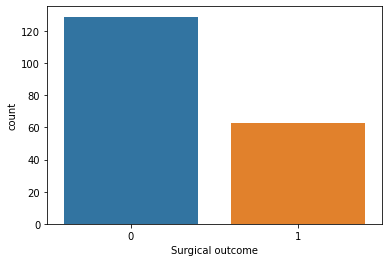

In [ ]:
sns.countplot(df['Surgical outcome'])

In [ ]:
df.isnull().sum()

Filename                                    0
Date of birth Patient                       0
Histology                                   0
Grading                                    10
FIGO stage                                  0
BRCA                                       44
ECOG Performance Status                     6
ca125 (integer)                            11
he4 (integer)                             133
ca 15.3 (integer)                          92
ca 19.9 (integer)                          67
cea (integer)                              94
Familiarity with breast/ovarian cancer      0
Pre-surgery CT date                         0
Date of first intervention                  0
Type of first intervention                  0
RT                                          0
Neoadjuvant therapy                         0
IDS                                        67
Data IDS                                  152
RT IDS                                    159
Relapse                           

In [ ]:
df.shape

(192, 27)

In [ ]:
#Finding missing data and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis = 1, keys = ['total_null', 'percent_null'])
missing_df.head()

,total_null,percent_null
Date of death,175,0.911458
RT IDS,159,0.828125
Recurrence date,154,0.802083
Data IDS,152,0.791667
he4 (integer),133,0.692708


In [ ]:
df = df.drop(['Filename','Date of birth Patient', 'Date of death', 'RT IDS', 'Recurrence date','Data IDS' , 'Last follow up',
              'Pre-surgery CT date', 'Date of first intervention','Recurrence date', 'Date of death'],axis='columns')
df.head()

,Histology,Grading,FIGO stage,BRCA,ECOG Performance Status,ca125 (integer),he4 (integer),ca 15.3 (integer),ca 19.9 (integer),cea (integer),Familiarity with breast/ovarian cancer,Type of first intervention,RT,Neoadjuvant therapy,IDS,Relapse,Death,Surgical outcome
0,Carcinoma Sieroso Alto Grado,3.0,III b,VUS,0.0,963.0,NaN,NaN,NaN,NaN,Mammella,PDS,0,No,NaN,No,NaN,0
1,Altri carcinomi ovarici,NaN,I,NaN,0.0,70.0,95.0,37.0,76.0,NaN,Mammella,PDS,0,No,NaN,No,No,0
2,Carcinoma Sieroso Alto Grado,3.0,III c,non mutata,1.0,236.0,996.0,NaN,6.0,1.0,No,PDS,0,No,No,No,No,0
3,Carcinoma Sieroso Alto Grado,3.0,III c,non mutata,0.0,1228.0,NaN,74.0,13.0,1.6,Mammella,LPS DGN,2,Si,No,Si,No,1
4,Carcinoma Sieroso Alto Grado,3.0,IV,non mutata,0.0,2709.0,387.0,NaN,NaN,NaN,No,LPS diagnostica,2,Si,Si,Si,No,1


In [ ]:
df.shape

(192, 18)

In [ ]:
#Finding missing data and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis = 1, keys = ['total_null', 'percent_null'])
missing_df.head()

,total_null,percent_null
he4 (integer),133,0.692708
cea (integer),94,0.489583
ca 15.3 (integer),92,0.479167
ca 19.9 (integer),67,0.348958
IDS,67,0.348958


In [ ]:
total = 0
for i in missing_df['total_null']:
    total += i
print(total)

534


he4 (integer)


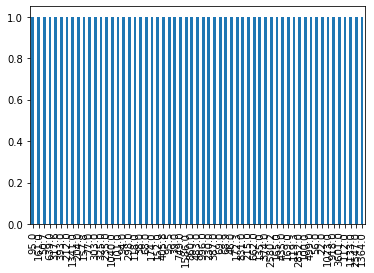

cea (integer)


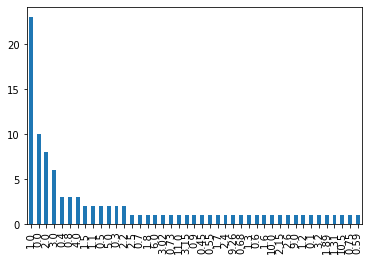

ca 15.3 (integer)


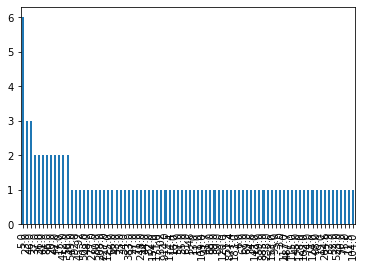

ca 19.9 (integer)


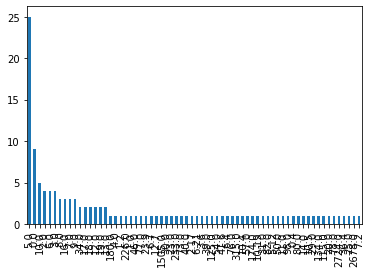

IDS


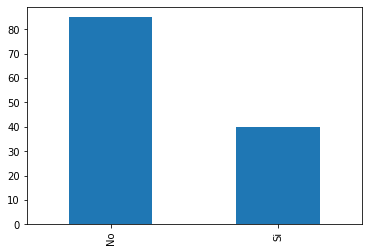

BRCA


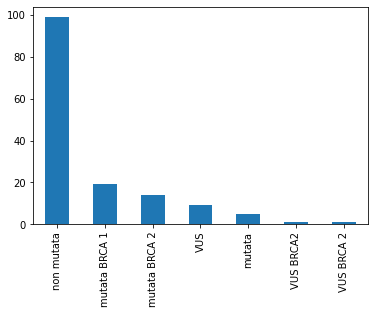

ca125 (integer)


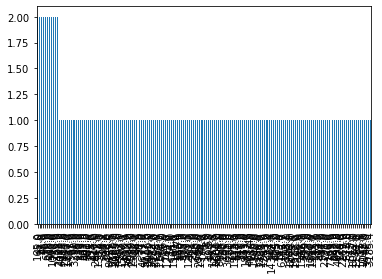

Death


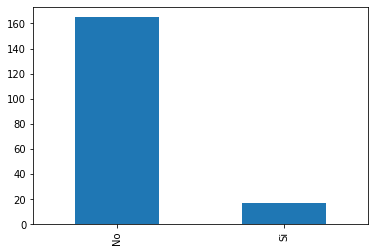

Grading


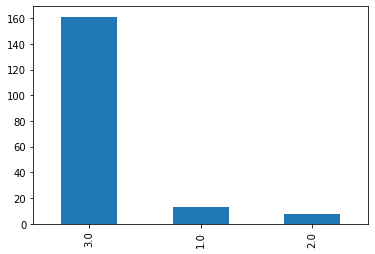

ECOG Performance Status


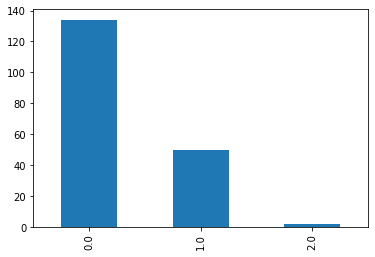

Neoadjuvant therapy


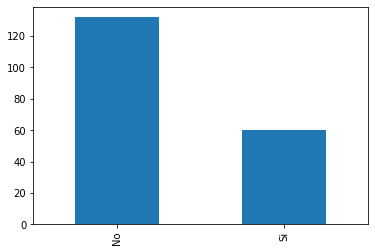

Relapse


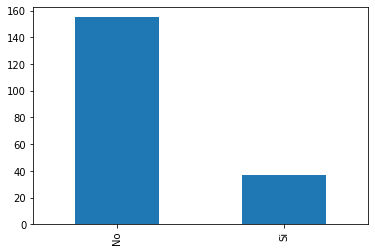

Histology


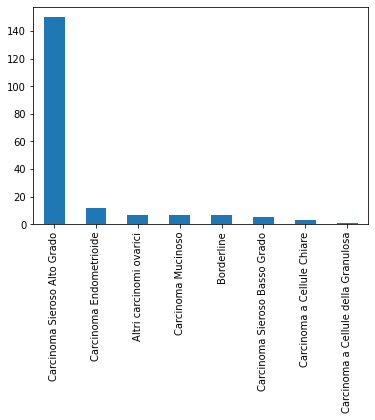

RT


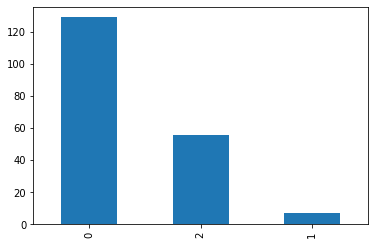

Type of first intervention


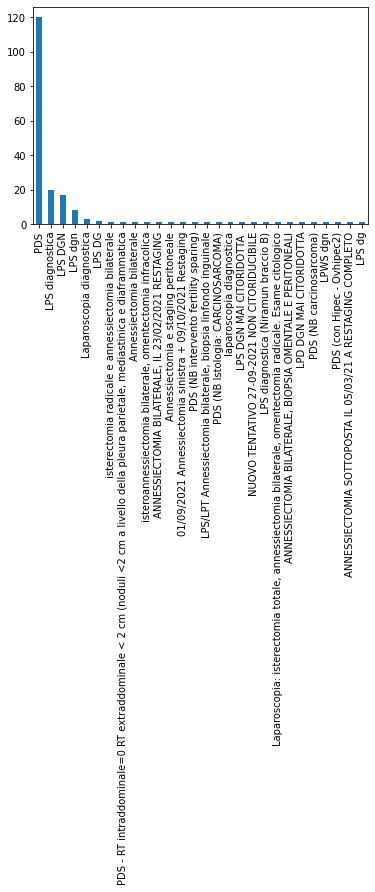

Familiarity with breast/ovarian cancer


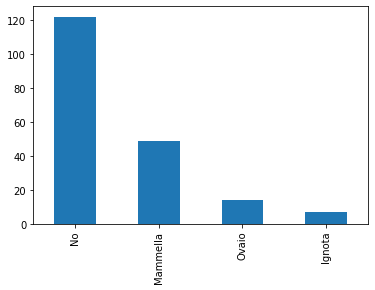

FIGO stage


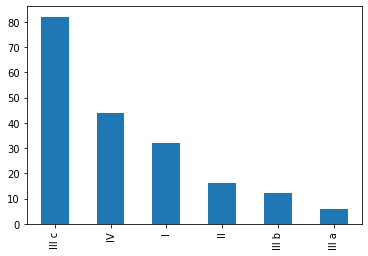

Surgical outcome


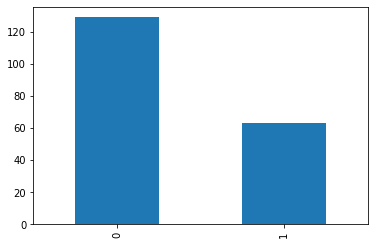

In [ ]:
for missing_column in missing_df.index[:18]:
    df[missing_column].value_counts().plot.bar()
    print(missing_column)
    plt.show()

In [ ]:
for column in missing_df.index[:18]:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Histology                                 0
Grading                                   0
FIGO stage                                0
BRCA                                      0
ECOG Performance Status                   0
ca125 (integer)                           0
he4 (integer)                             0
ca 15.3 (integer)                         0
ca 19.9 (integer)                         0
cea (integer)                             0
Familiarity with breast/ovarian cancer    0
Type of first intervention                0
RT                                        0
Neoadjuvant therapy                       0
IDS                                       0
Relapse                                   0
Death                                     0
Surgical outcome                          0
dtype: int64

In [ ]:
df.isnull().any()

Histology                                 False
Grading                                   False
FIGO stage                                False
BRCA                                      False
ECOG Performance Status                   False
ca125 (integer)                           False
he4 (integer)                             False
ca 15.3 (integer)                         False
ca 19.9 (integer)                         False
cea (integer)                             False
Familiarity with breast/ovarian cancer    False
Type of first intervention                False
RT                                        False
Neoadjuvant therapy                       False
IDS                                       False
Relapse                                   False
Death                                     False
Surgical outcome                          False
dtype: bool

In [ ]:
df.head(5)

,Histology,Grading,FIGO stage,BRCA,ECOG Performance Status,ca125 (integer),he4 (integer),ca 15.3 (integer),ca 19.9 (integer),cea (integer),Familiarity with breast/ovarian cancer,Type of first intervention,RT,Neoadjuvant therapy,IDS,Relapse,Death,Surgical outcome
0,Carcinoma Sieroso Alto Grado,3.0,III b,VUS,0.0,963.0,22.0,5.0,5.0,1.0,Mammella,PDS,0,No,No,No,No,0
1,Altri carcinomi ovarici,3.0,I,non mutata,0.0,70.0,95.0,37.0,76.0,1.0,Mammella,PDS,0,No,No,No,No,0
2,Carcinoma Sieroso Alto Grado,3.0,III c,non mutata,1.0,236.0,996.0,5.0,6.0,1.0,No,PDS,0,No,No,No,No,0
3,Carcinoma Sieroso Alto Grado,3.0,III c,non mutata,0.0,1228.0,22.0,74.0,13.0,1.6,Mammella,LPS DGN,2,Si,No,Si,No,1
4,Carcinoma Sieroso Alto Grado,3.0,IV,non mutata,0.0,2709.0,387.0,5.0,5.0,1.0,No,LPS diagnostica,2,Si,Si,Si,No,1


In [ ]:
df1 = df.copy()

In [ ]:
le = LabelEncoder()

df1['Histology'] = le.fit_transform(df1['Histology'])
df1['FIGO stage'] = le.fit_transform(df1['FIGO stage'])
df1['BRCA'] = le.fit_transform(df1['BRCA'])

df1['Familiarity with breast/ovarian cancer'] = le.fit_transform(df1['Familiarity with breast/ovarian cancer'])
df1['Type of first intervention'] = le.fit_transform(df1['Type of first intervention'])

df1['Histology'] = le.fit_transform(df1['Histology'])
df1['IDS'] = le.fit_transform(df1['IDS'])
df1['Relapse'] = le.fit_transform(df1['Relapse'])
df1['Neoadjuvant therapy'] = le.fit_transform(df1['Neoadjuvant therapy'])
df1['Death'] = le.fit_transform(df1['Death'])


In [ ]:
df1.head(5)

,Histology,Grading,FIGO stage,BRCA,ECOG Performance Status,ca125 (integer),he4 (integer),ca 15.3 (integer),ca 19.9 (integer),cea (integer),Familiarity with breast/ovarian cancer,Type of first intervention,RT,Neoadjuvant therapy,IDS,Relapse,Death,Surgical outcome
0,4,3.0,3,0,0.0,963.0,22.0,5.0,5.0,1.0,1,19,0,0,0,0,0,0
1,0,3.0,0,6,0.0,70.0,95.0,37.0,76.0,1.0,1,19,0,0,0,0,0,0
2,4,3.0,4,6,1.0,236.0,996.0,5.0,6.0,1.0,2,19,0,0,0,0,0,0
3,4,3.0,4,6,0.0,1228.0,22.0,74.0,13.0,1.6,1,8,2,1,0,1,0,1
4,4,3.0,5,6,0.0,2709.0,387.0,5.0,5.0,1.0,2,12,2,1,1,1,0,1


In [ ]:
dataset = df1.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling = scaler.fit_transform(np.array(dataset['ca125 (integer)']).reshape(-1, 1))
scaling2 = scaler.fit_transform(np.array(dataset['he4 (integer)']).reshape(-1, 1))
scaling3 = scaler.fit_transform(np.array(dataset['ca 15.3 (integer)']).reshape(-1, 1))
scaling4 = scaler.fit_transform(np.array(dataset['ca 19.9 (integer)']).reshape(-1, 1))


In [ ]:
dataset['ca125 (integer)']=scaling
dataset['he4 (integer)']=scaling2
dataset['ca 15.3 (integer)']=scaling3
dataset['ca 19.9 (integer)']=scaling4

In [ ]:
dataset

,Histology,Grading,FIGO stage,BRCA,ECOG Performance Status,ca125 (integer),he4 (integer),ca 15.3 (integer),ca 19.9 (integer),cea (integer),Familiarity with breast/ovarian cancer,Type of first intervention,RT,Neoadjuvant therapy,IDS,Relapse,Death,Surgical outcome
0,4,3.0,3,0,0.0,-0.124299,-0.340828,-0.432338,-0.169182,1.0,1,19,0,0,0,0,0,0
1,0,3.0,0,6,0.0,-0.582020,-0.188674,-0.207332,0.071767,1.0,1,19,0,0,0,0,0,0
2,4,3.0,4,6,1.0,-0.496934,1.689282,-0.432338,-0.165789,1.0,2,19,0,0,0,0,0,0
3,4,3.0,4,6,0.0,0.011531,-0.340828,0.052831,-0.142033,1.6,1,8,2,1,0,1,0,1
4,4,3.0,5,6,0.0,0.770640,0.419942,-0.432338,-0.169182,1.0,2,12,2,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,4,3.0,4,6,1.0,-0.230400,-0.340828,-0.432338,-0.169182,1.0,2,10,2,1,1,1,0,1
188,4,3.0,4,1,1.0,-0.534351,-0.340828,-0.214364,-0.152214,1.5,2,8,2,1,1,0,0,1
189,4,3.0,4,6,1.0,0.020245,2.456305,-0.432338,-0.044975,1.0,2,8,2,1,1,0,0,1
190,0,3.0,2,6,0.0,1.014826,-0.340828,-0.432338,-0.161716,0.4,2,19,0,0,0,0,0,0


In [ ]:
#Determining the X and y
X = dataset.drop('Surgical outcome', axis=1)
y = dataset['Surgical outcome']

from collections import Counter
from imblearn.combine import SMOTETomek

#Implementing the SMOTE technique
smk = SMOTETomek(random_state=42)

X_smk, y_smk = smk.fit_resample(X, y)

# summarizing class distribution
print(Counter(y))
print(Counter(y_smk))

Counter({0: 129, 1: 63})
Counter({0: 129, 1: 129})


In [ ]:
# Making a train set for SMOTE
df_smote = X_smk
df_smote['Surgical outcome']=y_smk

#Reset the index
df_smote['index']=[i for i in range(len(df_smote))]
df_smote = df_smote.set_index('index')

X_smk = X_smk.drop(['index','Surgical outcome'],axis=1)

/home/moneeb/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution')

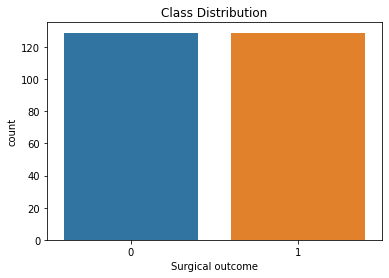

In [ ]:

sns.countplot(df_smote['Surgical outcome'])
plt.title('Class Distribution')

In [ ]:
new_df = df_smote.copy()

In [ ]:
new_df.head()

,Histology,Grading,FIGO stage,BRCA,ECOG Performance Status,ca125 (integer),he4 (integer),ca 15.3 (integer),ca 19.9 (integer),cea (integer),Familiarity with breast/ovarian cancer,Type of first intervention,RT,Neoadjuvant therapy,IDS,Relapse,Death,Surgical outcome
index,,,,,,,,,,,,,,,,,,
0,4,3.0,3,0,0.0,-0.124299,-0.340828,-0.432338,-0.169182,1.0,1,19,0,0,0,0,0,0
1,0,3.0,0,6,0.0,-0.582020,-0.188674,-0.207332,0.071767,1.0,1,19,0,0,0,0,0,0
2,4,3.0,4,6,1.0,-0.496934,1.689282,-0.432338,-0.165789,1.0,2,19,0,0,0,0,0,0
3,4,3.0,4,6,0.0,0.011531,-0.340828,0.052831,-0.142033,1.6,1,8,2,1,0,1,0,1
4,4,3.0,5,6,0.0,0.770640,0.419942,-0.432338,-0.169182,1.0,2,12,2,1,1,1,0,1


In [ ]:
new_df.shape

(258, 18)

/home/moneeb/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca125 (integer)', ylabel='count'>

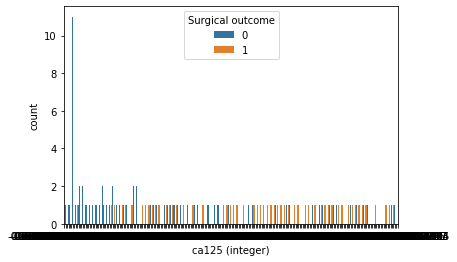

In [ ]:
sns.countplot(new_df['ca125 (integer)'],hue = new_df['Surgical outcome'])

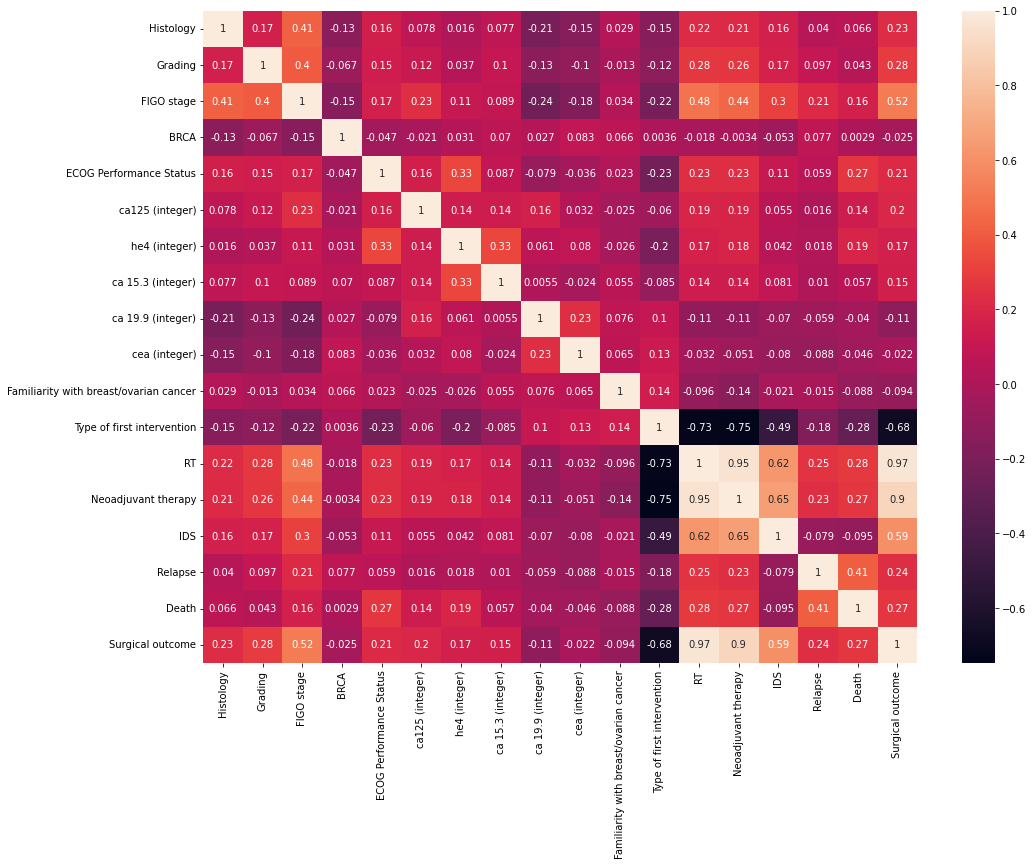

In [ ]:
corr_matrix = new_df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

y = new_df['Surgical outcome']
X = new_df.drop(['Surgical outcome'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((180, 17), (78, 17))

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_test, y_test)

LogisticRegression()

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
prediction = model.predict(X_test)

In [ ]:
print("*Confusion Matrix : ")
print(confusion_matrix(y_test, prediction))
print("*Classification Report: ")
print(classification_report(y_test, prediction))

*Confusion Matrix : 
[[42  0]
 [ 0 36]]
*Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        36

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)

In [ ]:
rf_model.fit(X_test, y_test)

RandomForestClassifier()

In [ ]:
rf_model.score(X_test,y_test)

1.0

In [ ]:
prediction = model.predict(X_test)

In [ ]:
print("*Confusion Matrix : ")
print(confusion_matrix(y_test, prediction))
print("*Classification Report: ")
print(classification_report(y_test, prediction))

*Confusion Matrix : 
[[42  0]
 [ 0 36]]
*Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        36

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



In [ ]:
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),random_state=42)

In [ ]:
ada_model.fit(X_test, y_test)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                   random_state=42)

In [ ]:
ada_model.score(X_test, y_test)

1.0

In [ ]:
prediction = model.predict(X_test)

In [ ]:
print("*Confusion Matrix : ")
print(confusion_matrix(y_test, prediction))
print("*Classification Report: ")
print(classification_report(y_test, prediction))

*Confusion Matrix : 
[[42  0]
 [ 0 36]]
*Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        36

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

